# UF Research Computing  

![UF Research Computing Logo](images/ufrc_logo.png)


This tutorial is adapted from: [Understanding PyTorch with an example: a step-by-step tutorial](https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e) by Daniel Godoy.

# Understanding PyTorch: Part 3

## Dynamic Computation Graph

> “Unfortunately, no one can be told what the dynamic computation graph is. You have to see it for yourself.” Morpheus

How great was “*The Matrix*”? Right, right? But, jokes aside, I want you to see the graph for yourself too!

The [PyTorchViz](https://github.com/szagoruyko/pytorchviz) package and its `make_dot(variable)` method allows us to easily visualize a graph associated with a given Python variable.

So, let’s stick with the **bare minimum**: two (*gradient computing*) **tensors** for our parameters, predictions, errors and loss.

In [6]:
%run generate_data.py

In [11]:
# Install PyTorchViz: https://github.com/szagoruyko/pytorchviz
!pip install torchviz --user

     |████████████████████████████████| 41 kB 54 kB/s  eta 0:00:011
  Created wheel for torchviz: filename=torchviz-0.0.1-py3-none-any.whl size=3521 sha256=5cb08101d3766dc2f6de4485dce2d6995013d95a06bf12f538e772764e15a996
  Stored in directory: /home/magitz/.cache/pip/wheels/10/7b/c8/3af79ec02e294a832c01037bcb38302bbcee0bb020dcbbbd3e
Successfully built torchviz


In [15]:
import torch 
from torchviz import make_dot

device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

yhat = a + b * x_train_tensor
error = y_train_tensor - yhat
loss = (error ** 2).mean()

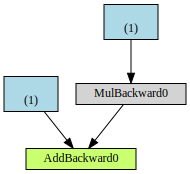

In [16]:
make_dot(yhat)

Let’s take a closer look at its components:

* **blue boxes**: these correspond to the **tensors** we use as **parameters**, the ones we’re asking PyTorch to **compute gradients** for;
* **gray box**: a **Python operation** that involves a **gradient-computing tensor** or **its dependencies**;
* **green box**: the same as the gray box, except it is the **starting point for the computation** of gradients (assuming the `backward()` method is called from the **variable used to visualize** the graph)— they are computed from the **bottom-up** in a graph.


Now, take a closer look at the **green box** of the top graph (*yhat*): there are two arrows pointing to it, since it is adding up two variables, *a* and *b\*x*. Seems obvious, right?

Then, look at the **gray box** of the same graph: it is performing a **multiplication**, namely, *b\*x*. But there is only one arrow pointing to it! The arrow comes from the **blue box** that corresponds to our parameter *b*.


If we plot graphs for the error and loss variables, the only difference between them and the first one is the number of intermediate steps (gray boxes).

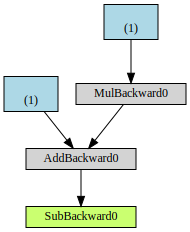

In [17]:
make_dot(error)

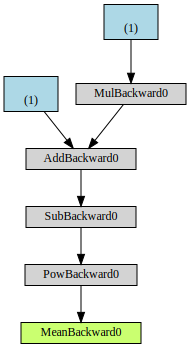

In [18]:
make_dot(loss)

Why don’t we have a box for our **data x**? The answer is: we **do not compute gradients** for it! So, even though there are *more* tensors involved in the operations performed by the computation graph, it **only** shows **gradient-computing tensors** and **its dependencies**.

What would happen to the computation graph if we set `requires_grad` to `False` for our parameter `a`?

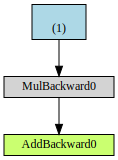

In [22]:
a_nograd = torch.randn(1, requires_grad=False, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

yhat = a_nograd + b * x_train_tensor

make_dot(yhat)

Unsurprisingly, the **blue box** corresponding to the **parameter a** is no more! Simple enough: **no gradients, no graph**.

The **best** thing about the *dynamic computing graph* is the fact that you can make it **as complex as you want** it. You can even use *flow control* statements (e.g., `if` statements) to control the flow of the gradients (obviously!) :-)\

The figure below shows an example of this. And yes, I do know that the computation itself is completely nonsense…

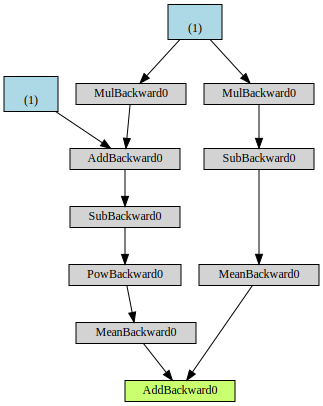

In [24]:
# Nonesne code to demonstrate complex graph

yhat = a + b * x_train_tensor
error = y_train_tensor - yhat

loss = (error**2).mean()

if loss > 0:
    yhat2 = b*x_train_tensor
    error2 = y_train_tensor - yhat2

loss += error2.mean()

make_dot(loss)

**[Continue to part 4 of the tutorial: 04_Optimizer_Loss.ipynb](04_Optimizer_Loss.ipynb)**